In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from pImpactR.util import naff
fname = 'lattice84_equilibrium_t0p1_c0p01_hkick586urad.h5'
data = h5py.File(fname, 'r')

# Check Data

In [2]:
list(data.keys())

['centroid', 'envelope', 'turn']

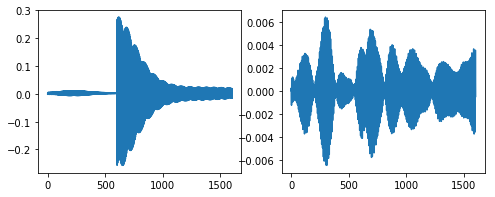

In [3]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(data['centroid'][:,0])
plt.subplot(1,2,2)
plt.plot(data['centroid'][:,1])

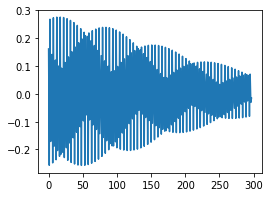

In [4]:
plt.figure(figsize=(4,3))
plt.plot(data['centroid'][602:900,0])

# Find Max Index

In [15]:
X =data['centroid'][602:,0]
iMax = np.argmax(X[:100])
X = X[iMax:]
X = X/X[0]

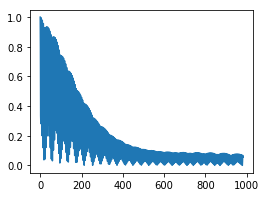

In [17]:
plt.figure(figsize=(4,3))
plt.plot(np.abs(X))

# Frequency Analysis

In [18]:
tune,amp,X1 = naff(1,X)
print(tune)

fftX = np.fft.fft(X)
fftX1 = np.fft.fft(X1)

[0.59738894]


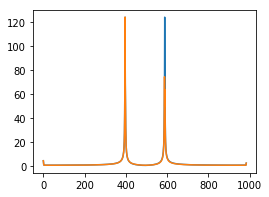

In [19]:
plt.figure(figsize=(4,3))
plt.plot(np.abs(fftX))
plt.plot(np.abs(fftX1))

In [23]:
nSample = 1024
Tune = tune + np.linspace(-0.005,0.005,nSample)
Amp = np.zeros(nSample,dtype=np.complex128)
n=len(X)
print(n)
for k in range(nSample):
    Amp[k] = np.sum(X*np.exp(-1j*2.0*np.pi*Tune[k]*np.arange(0,n)))

984


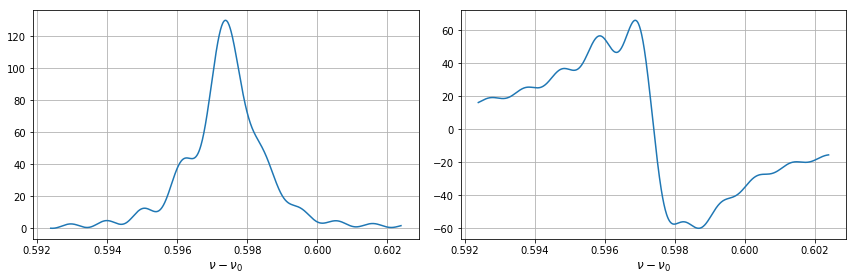

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(Tune,np.real(Amp))
plt.xlabel(r'$\nu-\nu_0$',fontsize=12);
plt.grid()
plt.subplot(1,2,2)
plt.plot(Tune,np.imag(Amp))
plt.xlabel(r'$\nu-\nu_0$',fontsize=12);
plt.grid()
plt.tight_layout()